# Comprehensive Analysis and Visualization of Historical Automobile Sales

In [4]:
# ==============================
# Import Libraries & Load CSV
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Load CSV
df = pd.read_csv('historical_automobile_sales.csv')

# Display first few rows
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


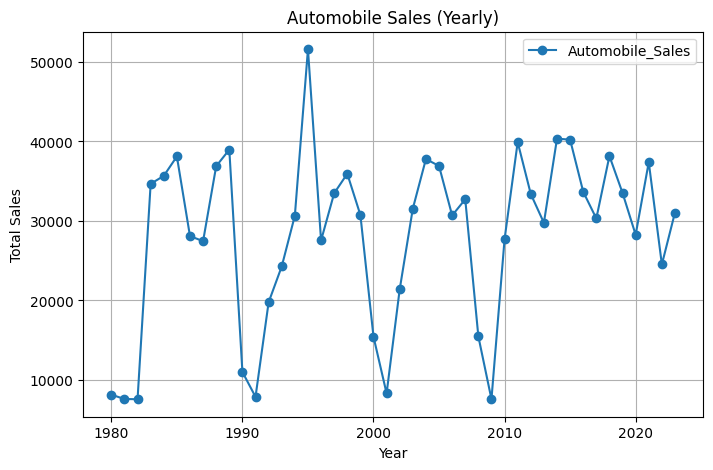

In [5]:
# Task 1.1 - Line Plot: Automobile Sales Yearly
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()
yearly_sales.plot(x='Year', y='Automobile_Sales', kind='line', marker='o', figsize=(8,5))
plt.title("Automobile Sales (Yearly)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

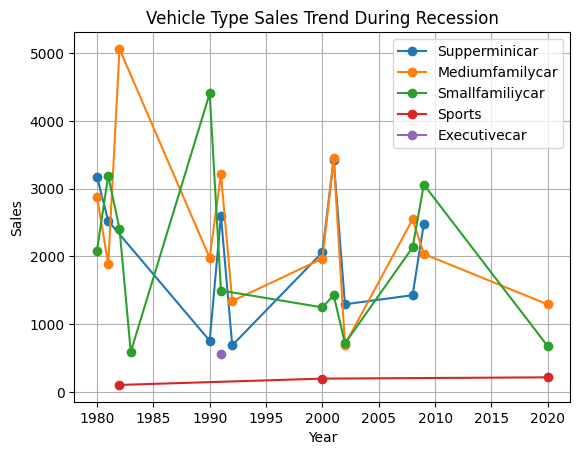

In [6]:
# Task 1.2 - Line Plot: Vehicle Type Sales Trend During Recession
recession_df = df[df['Recession']==1]  # ya 'Yes' agar CSV me text hai

for vt in recession_df['Vehicle_Type'].unique():
    subset = recession_df[recession_df['Vehicle_Type']==vt]
    trend = subset.groupby('Year')['Automobile_Sales'].sum()
    plt.plot(trend.index, trend.values, marker='o', label=vt)

plt.title("Vehicle Type Sales Trend During Recession")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

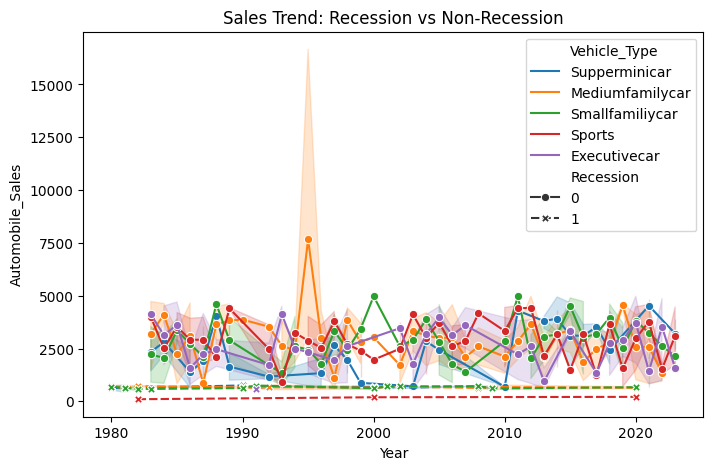

In [7]:
# Task 1.3 - Seaborn Line Plot: Recession vs Non-Recession
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True)
plt.title("Sales Trend: Recession vs Non-Recession")
plt.show()

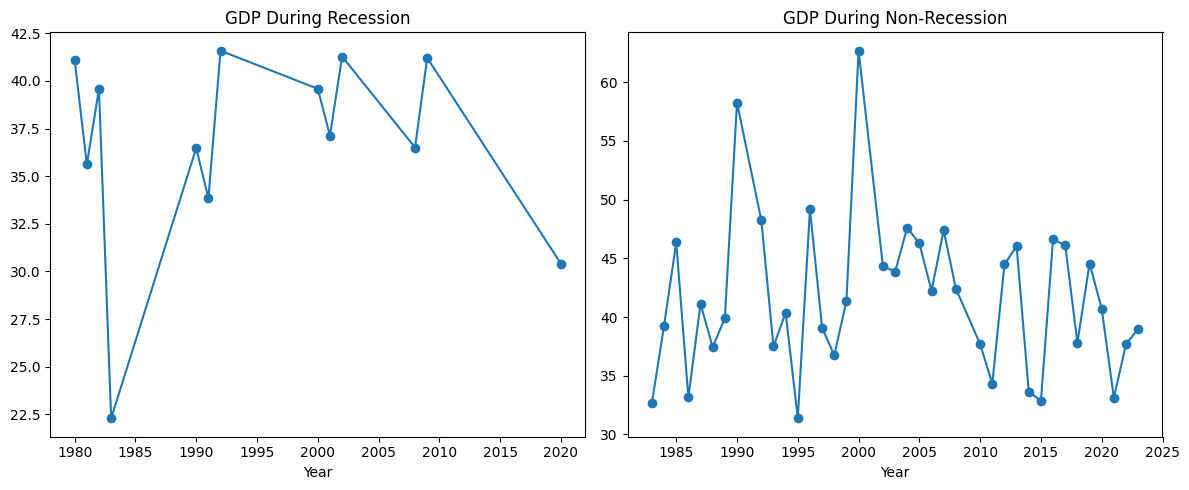

In [8]:
# Task 1.4 - GDP Variations
fig, axes = plt.subplots(1,2, figsize=(12,5))
df[df['Recession']==1].groupby('Year')['GDP'].mean().plot(ax=axes[0], marker='o', title='GDP During Recession')
df[df['Recession']==0].groupby('Year')['GDP'].mean().plot(ax=axes[1], marker='o', title='GDP During Non-Recession')
plt.tight_layout()
plt.show()

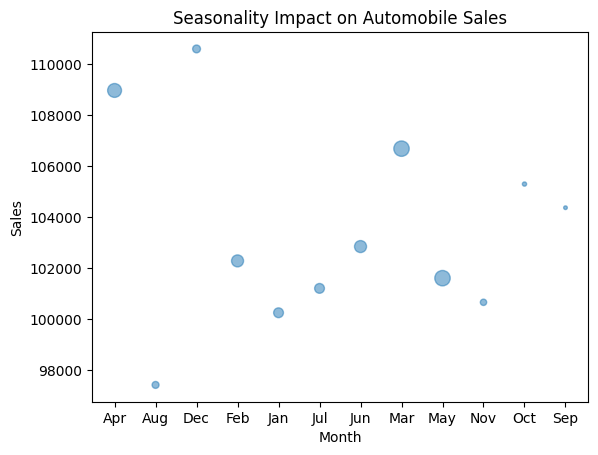

In [9]:
# Task 1.5 - Bubble Plot: Seasonality
season_df = df.groupby('Month')['Automobile_Sales'].sum().reset_index()
plt.scatter(season_df['Month'], season_df['Automobile_Sales'], s=df.groupby('Month')['Seasonality_Weight'].mean().values*100, alpha=0.5)
plt.title("Seasonality Impact on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

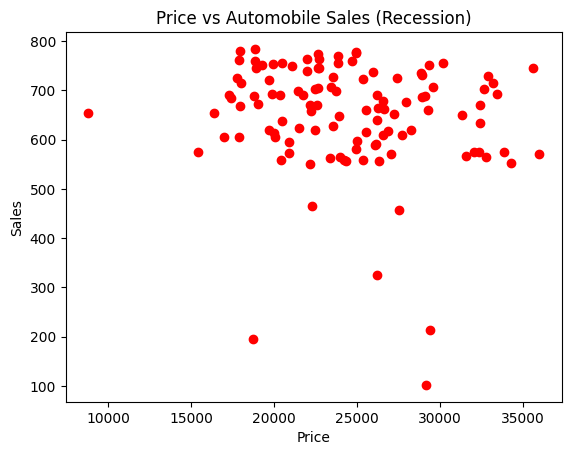

In [10]:
# Task 1.6 - Scatter Plot: Price vs Sales During Recession
recession_df = df[df['Recession']==1]
price_sales = recession_df.groupby('Price')['Automobile_Sales'].sum().reset_index()
plt.scatter(price_sales['Price'], price_sales['Automobile_Sales'], color='red', marker='o')
plt.title("Price vs Automobile Sales (Recession)")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

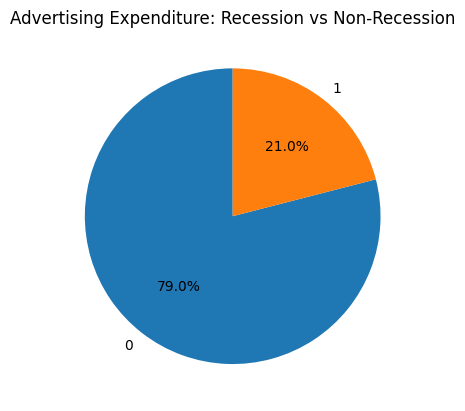

In [11]:
# Task 1.7 - Pie Chart: Ad Expenditure
ad_df = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()
plt.pie(ad_df['Advertising_Expenditure'], labels=ad_df['Recession'], autopct='%1.1f%%', startangle=90)
plt.title("Advertising Expenditure: Recession vs Non-Recession")
plt.show()

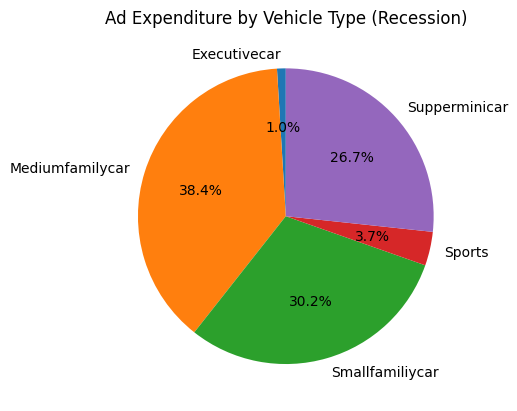

In [12]:
# Task 1.8 - Pie Chart: Ad Expenditure by Vehicle Type (Recession)
recession_ad = df[df['Recession']==1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
plt.pie(recession_ad['Advertising_Expenditure'], labels=recession_ad['Vehicle_Type'], autopct='%1.1f%%', startangle=90)
plt.title("Ad Expenditure by Vehicle Type (Recession)")
plt.show()

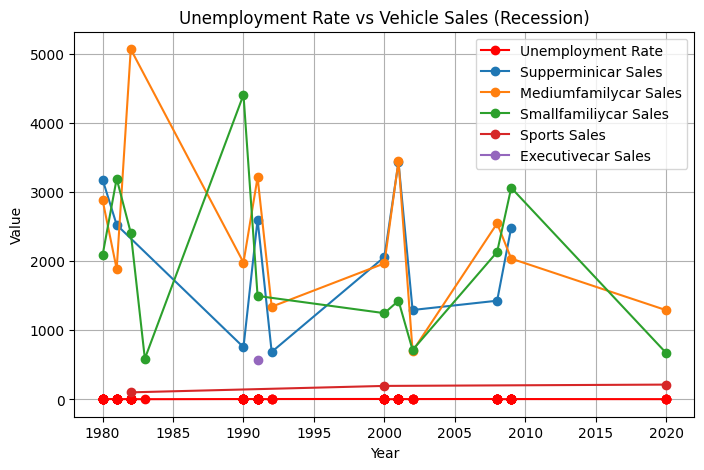

In [13]:
# Task 1.9 - Line Plot: Unemployment vs Vehicle Sales During Recession
recession_df = df[df['Recession']==1]

plt.figure(figsize=(8,5))
plt.plot(recession_df['Year'], recession_df['unemployment_rate'], marker='o', label='Unemployment Rate', color='red')

for vt in recession_df['Vehicle_Type'].unique():
    subset = recession_df[recession_df['Vehicle_Type']==vt]
    sales_per_year = subset.groupby('Year')['Automobile_Sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=f'{vt} Sales')

plt.title("Unemployment Rate vs Vehicle Sales (Recession)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# ==============================
# Import Libraries & Load CSV
# ==============================
import pandas as pd
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Load CSV
df = pd.read_csv('historical_automobile_sales.csv')

In [15]:
# Task 2.1 - Initialize Dash App
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign':'center'})
])

In [16]:
# Task 2.2 - Add Dropdowns
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign':'center'}),
    
    html.Label("Select Report Type:"),
    dcc.Dropdown(
        id='dropdown-report',
        options=[
            {'label':'Recession Report','value':'recession'},
            {'label':'Yearly Report','value':'yearly'}
        ],
        value='recession'
    ),
    
    html.Label("Select Vehicle Type:"),
    dcc.Dropdown(
        id='dropdown-vehicle',
        options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
        value=df['Vehicle_Type'].unique()[0]
    )
])

In [17]:
# Task 2.3 - Output Container
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign':'center'}),
    
    html.Label("Select Report Type:"),
    dcc.Dropdown(
        id='dropdown-report',
        options=[
            {'label':'Recession Report','value':'recession'},
            {'label':'Yearly Report','value':'yearly'}
        ],
        value='recession'
    ),
    
    html.Label("Select Vehicle Type:"),
    dcc.Dropdown(
        id='dropdown-vehicle',
        options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
        value=df['Vehicle_Type'].unique()[0]
    ),
    
    html.Div(id='output-container', className='output-container')
])

In [18]:
# Task 2.4 - Callback Function
@app.callback(
    Output('output-container','children'),
    [Input('dropdown-report','value'),
     Input('dropdown-vehicle','value')]
)
def update_graph(report_type, vehicle_type):
    if report_type=='recession':
        rec_df = df[(df['Recession']==1) & (df['Vehicle_Type']==vehicle_type)]
        if rec_df.empty:
            return html.Div("No data for selected options.")
        
        sales_trend = rec_df.groupby('Year')['Automobile_Sales'].sum().reset_index()
        fig1 = px.line(sales_trend, x='Year', y='Automobile_Sales', title=f"{vehicle_type} Sales Trend During Recession", markers=True)
        
        price_sales = rec_df.groupby('Price')['Automobile_Sales'].sum().reset_index()
        fig2 = px.scatter(price_sales, x='Price', y='Automobile_Sales', size='Automobile_Sales', title=f"Price vs Sales ({vehicle_type}, Recession)")
        
        return html.Div([dcc.Graph(figure=fig1), dcc.Graph(figure=fig2)])
    
    elif report_type=='yearly':
        yearly_df = df[df['Vehicle_Type']==vehicle_type]
        sales_yearly = yearly_df.groupby('Year')['Automobile_Sales'].sum().reset_index()
        fig = px.bar(sales_yearly, x='Year', y='Automobile_Sales', title=f"{vehicle_type} Yearly Sales Report")
        return dcc.Graph(figure=fig)

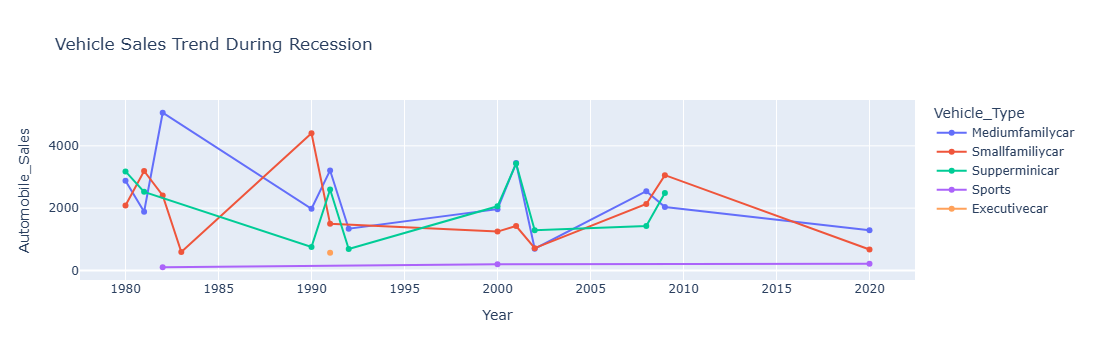

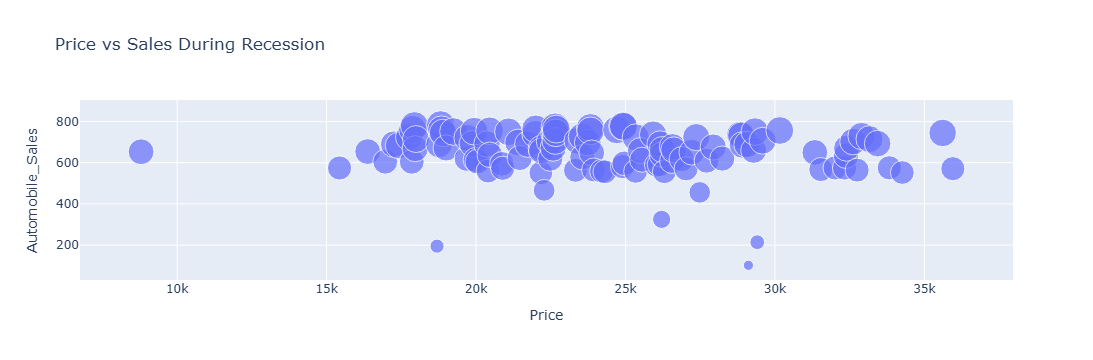

In [19]:
# Task 2.5 - Recession Report Graphs
rec_df = df[df['Recession']==1]

sales_trend = rec_df.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
fig_line = px.line(sales_trend, x='Year', y='Automobile_Sales', color='Vehicle_Type', markers=True, title="Vehicle Sales Trend During Recession")
fig_line.show()

price_sales = rec_df.groupby('Price')['Automobile_Sales'].sum().reset_index()
fig_scatter = px.scatter(price_sales, x='Price', y='Automobile_Sales', size='Automobile_Sales', title="Price vs Sales During Recession")
fig_scatter.show()

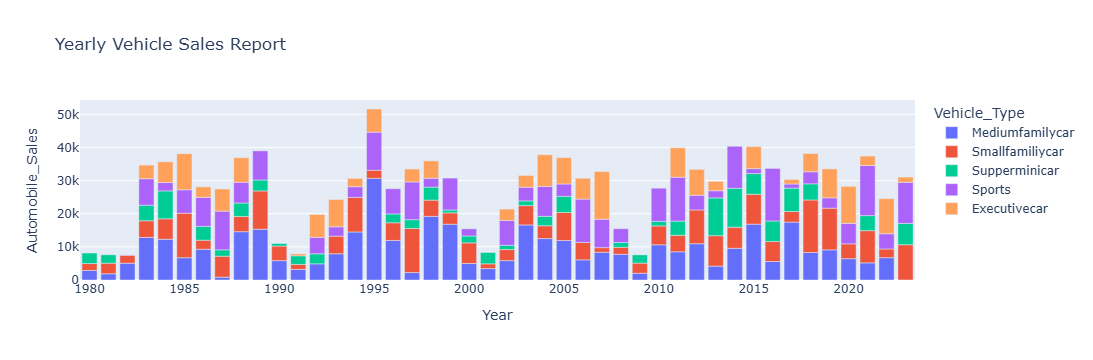

In [20]:
# Task 2.6 - Yearly Report Graphs
yearly_df = df.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
fig_bar = px.bar(yearly_df, x='Year', y='Automobile_Sales', color='Vehicle_Type', title="Yearly Vehicle Sales Report")
fig_bar.show()

In [21]:
from dash import Dash, html, dcc

In [22]:
from jupyter_dash import JupyterDash as Dash
from dash import html, dcc

In [27]:
app.run(mode="inline")

## Author
Hashim Shaikh